## 事前準備

In [1]:
# データの読み込み

from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['.ipynb_checkpoints', 'neg', 'pos']


In [2]:
print("x : {}".format(x_train[0]))
print("y : {}".format(y_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.
y : 2


## BOW

In [3]:
# 例

mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# \bは単語の始まりと終わり、|wはアルファベット
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
# toaaray付けないとデータ形
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


## n-gram

In [6]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

In [7]:
test_txt = ['This movie is SOOOO funny!!! \
What a movie! I never \
best movie ever!!!!! this movie']

In [8]:
# 1-gram
# !はアルファベットではないので除いている

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
gram_1 = vectorizer.fit_transform(test_txt).toarray()
pd.DataFrame(gram_1, columns=vectorizer.get_feature_names())

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,1,1,1,1,1,1,4,1,1,2,1


In [9]:
# 2-gram
# !はアルファベットではないので除いている

vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
gram_1 = vectorizer.fit_transform(test_txt).toarray()
pd.DataFrame(gram_1, columns=vectorizer.get_feature_names())

,a movie,best movie,ever this,funny what,i never,is soooo,movie ever,movie i,movie is,never best,soooo funny,this movie,what a
0,1,1,1,1,1,1,1,1,1,1,1,2,1


# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。

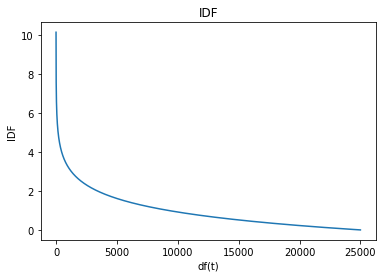

In [10]:
# IDEの図
# 少ない方が、大きな値をとる

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

## ストップワード

あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを ストップワード と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします。

In [11]:
# is, aを除く

vectorizer = CountVectorizer(stop_words=["is", 'a'], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,film,good,movie,this,very
0,0,0,1,1,1,1
1,0,1,1,0,1,0
2,2,0,0,0,0,3


In [12]:
# 最大5個

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


## nltkのダウンロード

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/matsusesatoshi/nltk_data...
[nltk_data]    |   P

True

In [15]:
# この単語は意味のない単語なので除きたい

stopset = list(stopwords.words('english'))
stopset[:5]

['i', 'me', 'my', 'myself', 'we']

## 前処理

In [16]:
# 一単語でリストにする
x_train[0].split(' ')[:3]

['Zero', 'Day', 'leads']

In [17]:
# listに変更
x_train_list = []

for i in range(len(x_train)):
    x_train_list.append(x_train[i].split(' '))

In [18]:
# 多重リストになった...
x_train_list[0][0]

'Zero'

In [19]:
# 多重リスト解除
# printのlimit

import itertools
print(list(itertools.chain.from_iterable(x_train_list)))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [20]:
x_train_list2 = list(itertools.chain.from_iterable(x_train_list))
x_train_list2[1]

'Day'

## TF

In [21]:
x_train_list2[0]

'Zero'

In [22]:
# # 5000までのndarray

# vectorizer = CountVectorizer(stop_words=stopset, max_features=5000)
# train_set = vectorizer.fit_transform(x_train_list2).toarray()

In [23]:
# train_set.shape

In [24]:
# これだと各文字に対して、カウントを行う事になる
# 文章を一つに繋げて、それに対してvectrizersする必要がある？？？

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
test = vectorizer.fit_transform(x_train_list2[:5000]).toarray()
pd.DataFrame(test, columns=vectorizer.get_feature_names()).head()

,10,101,105,14,1928,1988,2,2004,22,23,...,youngest,your,yourself,youth,yr,yun,zero,zivagho,zombies,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# 各レビューに対しての解析結果が表示されている

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
test = vectorizer.fit_transform(x_train[:5]).toarray()
pd.DataFrame(test, columns=vectorizer.get_feature_names()).head()

,10,14,22,30,747,a,about,actions,actors,actually,...,words,world,would,writing,you,young,youngest,yourself,zero,zivagho
0,0,0,0,0,0,6,0,1,1,0,...,0,1,1,0,2,2,0,0,1,0
1,0,0,0,0,1,5,0,0,0,0,...,1,1,0,1,5,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,2,0,0,1,2,...,0,1,0,0,2,0,1,0,0,0
4,0,1,1,0,0,7,2,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [26]:
len(x_train)

25000

In [27]:
x_train[0:2]

["Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.",
 'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich

In [28]:
# リストの区切りである,を半角スペースで区切り展開
# それをリストにしている

x_train_sum = ' '.join(x_train)
x_train_sum_list = []
x_train_sum_list.append(x_train_sum)

In [29]:
# このライブラリはlistしか受け取れない
# 文章結合するならこのやり方。

vectorizer = CountVectorizer(stop_words=stopset, max_features=5000, token_pattern=r'(?u)\b\w+\b')
test = vectorizer.fit_transform(x_train_sum_list).toarray()
pd.DataFrame(test, columns=vectorizer.get_feature_names()).head()

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,232,93,300,2229,4351,460,370,330,262,85,...,810,3660,503,275,102,384,85,740,518,145


In [30]:
# 5000個までベクトル化

vectorizer = CountVectorizer(stop_words=stopset, max_features=5000, token_pattern=r'(?u)\b\w+\b')
test = vectorizer.fit_transform(x_train).toarray()
df = pd.DataFrame(test, columns=vectorizer.get_feature_names())

In [31]:
# 列方向で合計すれば多い順にできる

df.sum().sort_values(ascending=False)[:20]

br        101871
movie      44047
film       40159
one        26795
like       20281
good       15147
time       12727
even       12655
would      12436
story      11988
really     11738
see        11479
well       10667
much        9764
get         9311
bad         9308
people      9287
also        9159
first       9064
great       9060
dtype: int64

## tf-IDF

In [32]:
test.shape

(25000, 5000)

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidftrainsformar = TfidfTransformer(norm=None)

tf_idf = tfidftrainsformar.fit_transform(test)

In [34]:
# tf_idfの値
tf_idf.toarray().shape

(25000, 5000)

In [35]:
# idfの値
tfidftrainsformar.idf_

array([5.82336619, 6.71995186, 5.7285084 , ..., 5.32757845, 5.57371152,
       6.29835737])

# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

25000, 5000 のデータとして2値分類を行う？(pos, negとして)  
tfidfの指標ってpos,negで分かれているわけではない気がするけど　....  
TF : ある文章の中でその単語の頻出回数の指標  
IDF : 全文章の中でその単語の頻出回数の対数変換(少ない方が高い)

## n_gram(1, 1)

In [36]:
# train,testをtfidfにする

vectorizer = CountVectorizer(stop_words=stopset, max_features=5000, token_pattern=r'(?u)\b\w+\b')
x_train_count = vectorizer.fit_transform(x_train).toarray()
x_train_tfidf= tfidftrainsformar.fit_transform(x_train_count).toarray()

x_test_count = vectorizer.fit_transform(x_test).toarray()
x_test_tfidf= tfidftrainsformar.fit_transform(x_test_count).toarray()

In [37]:
x_train_tfidf.shape, x_test_tfidf.shape

((25000, 5000), (25000, 5000))

In [38]:
print(np.unique(y_train, return_counts=True))

(array([1, 2]), array([12500, 12500]))


In [39]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train_tfidf, y_train)

RandomForestClassifier(random_state=0)

In [40]:
feature = clf.feature_importances_
feature_df = pd.DataFrame({'columns': vectorizer.get_feature_names() , 'feature': feature[:]}).set_index('columns')
feature_df_10 = feature_df.sort_values('feature', ascending=False).head(10)
feature_df_10

,feature
columns,
bam,0.020405
worst,0.018645
greek,0.012419
warn,0.010636
back,0.008192
exceptions,0.008146
bound,0.007463
temple,0.006119
worse,0.005915


みた感じいい感じの言葉によって分類できていそう  

bam : 大きな音(バン)という音が立つ  
greek : 意味不明  

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf.predict(x_test_tfidf))

0.31056

鬼の様に低い値になった。  

## n-gram(2, 2)

In [42]:
vectorizer = CountVectorizer(stop_words=stopset, ngram_range=(2, 2), max_features=5000, token_pattern=r'(?u)\b\w+\b')
x_train_count = vectorizer.fit_transform(x_train).toarray()
x_train_tfidf= tfidftrainsformar.fit_transform(x_train_count).toarray()

x_test_count = vectorizer.fit_transform(x_test).toarray()
x_test_tfidf= tfidftrainsformar.fit_transform(x_test_count).toarray()

In [43]:
clf.fit(x_train_tfidf, y_train)
feature = clf.feature_importances_
feature_df = pd.DataFrame({'columns': vectorizer.get_feature_names() , 'feature': feature[:]}).set_index('columns')
feature_df_10 = feature_df.sort_values('feature', ascending=False).head(10)
feature_df_10

,feature
columns,
war movies,0.013666
old man,0.011678
one takes,0.007802
50 years,0.006681
br cannot,0.006501
10 br,0.006149
30 seconds,0.005972
mulholland drive,0.005904
25 years,0.005893


In [44]:
accuracy_score(y_test, clf.predict(x_test_tfidf))

0.313

# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です

In [45]:
test_txt = ['This movie is SOOOO funny!!!',
'What a movie! I never',
'best movie ever!!!!! this movie']

In [46]:
def get_tfidf(txt):
    """
    txtからtfを求める

    param
    ----------
    txt : str

    return
    ----------
    tf : float
    """

    # からリスト
    word_list = []
    

    for sample in range(len(txt)):    

        # listにする
        txt_list = txt[sample].split(' ')
        
        for word in txt_list:
            
            word_list.append(word)
            
    # count
    txt_dict = np.unique(word_list)
    
#    display(txt[0].split(' '))
#    display(txt[1].split(' '))
#    display(txt[2].split(' '))
    
    # 形
    tf = np.zeros((len(txt), len(txt_dict)))
    
    # 行数指定
    for sample in range(len(txt)):
        
        # listにする
        txt_list = txt[sample].split(' ')
        
        # txt_dictの内容を取り出す
        for i, word in enumerate (txt_dict):
            
            # 今回の行のlist　
            for test in txt_list:
            
                if word == test:
                    
                     tf[sample, i] += 1
                        
                        
    # idf
    idf = np.zeros_like(tf)
    
    # 行数指定
    for sample in range(tf.shape[0]):
        
        for word in range(tf.shape[1]):
            
            idf[sample, word] = tf[sample, word] / tf[:, word].sum()

    tf_idf = tf * idf

    return tf_idf

In [47]:
pd.DataFrame(get_tfidf(test_txt))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.333333,0.0,0.0,1.0


In [48]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
vectorizer.fit_transform(test_txt).toarray()

array([[0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0]])

In [49]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
tfidftrainsformar = TfidfTransformer(norm=None)
pd.DataFrame(tfidftrainsformar.fit_transform(vectorizer.fit_transform(test_txt).toarray()).toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


## Gensim (v3.8.0)
## CROW
![Imgur](https://i.imgur.com/1fcCRlZh.png)

In [50]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.0172748   0.03328232 -0.01610846 -0.04291699  0.04242611  0.01964003
 -0.04739462  0.03996596  0.024813   -0.02256359]
movieのベクトル : 
[-0.00271827 -0.00831042 -0.01156583  0.04134931  0.00313946  0.03433896
 -0.03674527  0.04493453 -0.04936462 -0.00241873]
isのベクトル : 
[-0.04947062  0.01145157  0.02679083  0.0410726   0.03055781  0.04102553
 -0.02883833  0.01251877 -0.04624247 -0.02336159]
veryのベクトル : 
[ 0.01252721 -0.00368039 -0.04624985 -0.01770563 -0.03174151 -0.04513783
 -0.01481242 -0.04532474  0.01633734  0.03898289]
goodのベクトル : 
[ 0.01574192 -0.00340551 -0.01439514 -0.03970139 -0.02044371  0.02108212
 -0.01679539  0.03835325 -0.00410553  0.00100423]
filmのベクトル : 
[-0.03319058 -0.01299587 -0.04194384  0.03754751 -0.0271932   0.0459366
 -0.02341639 -0.00845311 -0.03467143  0.01866276]
aのベクトル : 
[-0.03644793 -0.03646229 -0.02408833  0.02552767 -0.03871772  0.01696007
  0.03121668  0.02412652

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/1735716006.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習


In [51]:
# 距離計算
model.wv.most_similar(positive="good", topn=3)

[('this', 0.544606626033783),
 ('movie', 0.264895498752594),
 ('film', 0.058551035821437836)]

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/1959044447.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors_tsne = tsne_model.fit_transform(model[vocabs])


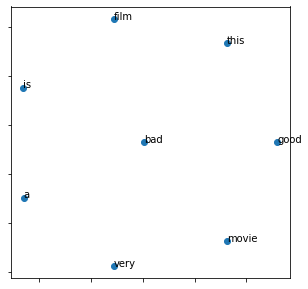

In [52]:
# 可視化
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [57]:
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [118]:
# まずは一文章
def test1(txt):
    
    txt = txt.replace('.', '')
    txt = txt.replace(',', '')
    txt = txt.replace('- ', '')
    txt = txt.replace('/', '')
    txt = txt.replace('"', '')
    txt = txt.replace("'", '')
    txt = txt.replace('<br >', '')
    txt = txt.replace('(', '')
    txt = txt.replace(')', '')
    
    txt = txt.lower()
    txt_list = txt.split(' ')
    
    return txt_list

In [120]:
test1(x_train[1])[0]

'words'

In [129]:
# 2文章以上
def exception(txtes):
    
    txt_word = []
    
    for txt in txtes:
        
        txt = txt.replace('.', '')
        txt = txt.replace(',', '')
        txt = txt.replace('- ', '')
        txt = txt.replace('/', '')
        txt = txt.replace('"', '')
        txt = txt.replace("'", '')
        txt = txt.replace('<br >', '')
        txt = txt.replace('(', '')
        txt = txt.replace(')', '')

        txt = txt.lower()

        txt_list = txt.split(' ')
        
        txt_word.append(txt_list)
    
    return txt_word

In [130]:
exception(x_train[:100])[99][0]

'some'

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [131]:
train_word = exception(x_train[:100])

In [132]:
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(train_word) # 準備
model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/3090689021.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習


(87171, 114480)

In [135]:
for vocab in model.wv.vocab.keys():
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

zeroのベクトル : 
[ 0.01495791 -0.06325077 -0.01918529  0.02862105  0.10983875  0.17762582
 -0.09146538 -0.08474186  0.06366363 -0.15618524]
dayのベクトル : 
[-4.33697691e-03 -1.70909129e-02  1.05980085e-04 -1.28141334e-02
  8.02673921e-02  1.36073157e-01 -1.76956370e-01 -9.79335383e-02
  4.84381653e-02 -1.66024312e-01]
leadsのベクトル : 
[-0.05085099 -0.07843672 -0.06512685 -0.02447172 -0.00572609  0.09320555
 -0.11106421 -0.09697821  0.02009887 -0.11717156]
youのベクトル : 
[-0.21224886 -0.58882946 -0.26391104  0.19851433  0.70143574  1.4900132
 -1.4082512  -0.76458293  0.7395338  -1.4100617 ]
toのベクトル : 
[-0.38847724 -1.0759954  -0.4975026   0.3763313   1.268011    2.7787905
 -2.631794   -1.4201373   1.4314815  -2.4925928 ]
thinkのベクトル : 
[-0.05039303 -0.0990681  -0.06831177  0.03455242  0.17390095  0.33883804
 -0.36255512 -0.21827331  0.16266797 -0.36862734]
evenのベクトル : 
[-0.19442242 -0.47036046 -0.220384    0.1511666   0.4830696   1.1734519
 -1.0819056  -0.62621504  0.5843666  -0.99201787]
re-thinkのベクト

# 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/2841789633.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習
/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/2841789633.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors_tsne = tsne_model.fit_transform(model[vocabs])


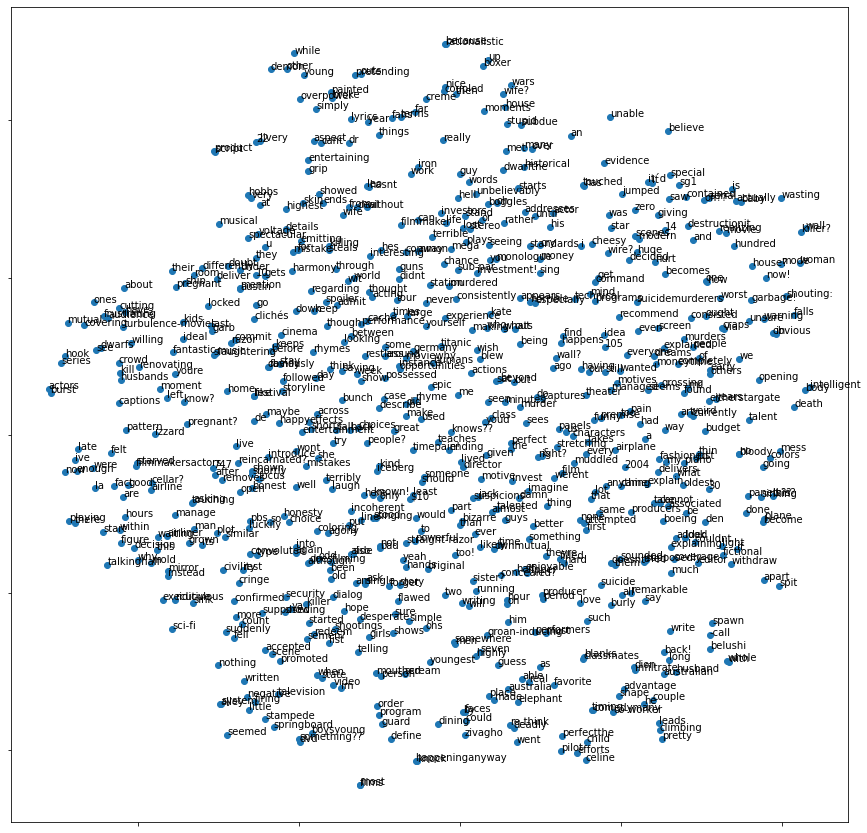

In [137]:
train_word = exception(x_train[:10])
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(train_word) # 準備
model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習

vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [139]:
# 似ている言葉を探す
train_word = exception(x_train)
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(train_word) # 準備
model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習

for i in model.most_similar('bad'):
    print(i)

/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/179784083.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  model.train(train_word, total_examples=model.corpus_count, epochs=model.iter) # 学習


('scary', 0.9844549894332886)
('sad', 0.9593231081962585)
('horrible', 0.9541453719139099)
('damn', 0.9474037885665894)
('awful', 0.9462788105010986)
('*cried*', 0.9416643381118774)
('funny', 0.9415433406829834)
('starti', 0.9390089511871338)
('ok', 0.9381133913993835)
('hammish', 0.9361858367919922)


/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/179784083.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model.most_similar('bad'):


すごい！！かなりの精度が出てる

In [142]:
for i in model.most_similar('good'):
    print(i)

('truly', 0.9615411758422852)
('terrible', 0.9606513977050781)
('wilson!', 0.9529881477355957)
('lack-lustre', 0.9505605697631836)
('disappointed110', 0.9427283406257629)
('duchovanys', 0.936981737613678)
('incovenient', 0.9366441369056702)
('horribleness', 0.935122013092041)
('bad', 0.934694230556488)
('horrible', 0.9343878626823425)


/var/folders/ll/cdp3xh194t7_9c631lm07yx00000gn/T/ipykernel_8822/1191294983.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model.most_similar('good'):


# 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください

In [148]:
model.wv.toarray()

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'toarray'